# 1. Exploratory Data Analysis (EDA) para el reto con TCA Software Solutions

---

TCA es una empresa mexicana con sede en Monterrey que opera 52 hoteles en diversas regiones, cubriendo tres segmentos: hoteles de ciudad, resorts turísticos y hoteles boutique. Actualmente utilizan un modelo desarrollado en R con Holt-Winters para pronósticos semanales de ingresos por habitación.

El propósito de este proyecto es apoyarlos a crear un nuevo modelo usando Topological Data Analysis (opcional) en conjunto con Series de Tiempo, Clustering o una propuesta innovadora. 

Como parte del proyecto, la empresa nos compartió acceso a la Base de Datos donde se guarda la información de la industria hotelera que manejan. En este documento, se utiliza la tabla *iaar_Reservaciones*, ya que es la que mejor se acopla al propósito del proyecto, para hacer un **Análisis Exploratorio de los Datos (EDA)** y tener un mejor entendimiento de con qué estamos trabajando. Igualmente, de ser necesario, se pueden incorporar otras tablas al análisis. 

### Diccionario

A partir del documento *Matriz de Trazabilidad* que se nos compartió, tenemos la información de las siguientes columnas:

| **Campo**             | **Descripción**                       |
|-----------------------|---------------------------------------|
| h_fec_sda_okt       | Fecha de salida                        |
| h_nom               | Reservación                            |
| h_cod_reserva       | Número de confirmación                 |
| h_fec_sda_ok        | Fecha de confirmación (Dormidas)       |
| h_ult_cam_fec_ok    | Fecha de confirmación (Pick-up)        |
| h_edo               | Estado                                 |
| h_codigop           | Código postal                          |
| h_fec_lld           | Fecha de llegada                       |
| h_fec_sda           | Fecha de salida                        |
| h_num_noc           | Número de noches (cuartos noche)       |
| h_tot_hab           | Total de habitaciones                  |
| h_tfa_total         | Ingresos por habitación                |
| h_correo_e          | Correo electrónico                     |


## Importaciones

---

### Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr, spearmanr, normaltest

### Importación de datos

In [2]:
ruta = "C:/Users/danyj/OneDrive/Documents/Reto 8vo Semestre/Raw Data"
df_reservaciones = pd.read_csv(f"{ruta}/Reservaciones.csv")
df_estatus_hab = pd.read_csv(f"{ruta}/Estatus_Habitaciones.csv")
df_tipo_hab = pd.read_csv(f"{ruta}/Tipos_Habitaciones.csv")
df_seg_comp = pd.read_csv(f"{ruta}/Segmentos_Comp.csv")
df_canal = pd.read_csv(f"{ruta}/Canales.csv")

C:\Users\danyj\AppData\Local\Temp\ipykernel_32260\3405986207.py:2: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reservaciones = pd.read_csv(f"{ruta}/Reservaciones.csv")


## Merge de la tabla *Reservaciones* con otras tablas relevantes

---

In [3]:
df_merged = df_reservaciones.merge(df_estatus_hab, on = 'ID_estatus_reservaciones', how = 'left')
df = df_merged.copy()

In [4]:
df_merged = df.merge(df_tipo_hab, on = 'ID_Tipo_Habitacion', how = 'left')
df = df_merged.copy()

In [5]:
df_merged = df.merge(df_seg_comp, on='ID_Segmento_Comp', how = 'left')
df = df_merged.copy()

In [6]:
df_merged = df.merge(df_canal, on = 'ID_canal', how = 'left')
df = df_merged.copy()

In [7]:
df.to_csv(f"{ruta}/df_merged.csv", index = False)

## Análisis exploratorio

---

### 1. Información general

In [8]:
df.head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,estatus_reservaciones,Tipo_Habitacion_cve,Tipo_Habitacion_nombre,Cupo,Clasificacion,Segmento_Comp_Cve,Segmento_Comp_Nombre,Segmento_Comp_orden,Canal_cve,Canal_nombre
0,0,2019-08-16 00:00:00.000,20190816,2019-08-16,2019-08-16 00:00:00.000,2,0,2,0,0,...,SALIDA,MSD,ESTD 2Q SN12MST,2,MST,INDEPV,INDIVIDUAL EP/VAC. CLUB,9999.999,09,MULTIVACACIONES 2
1,1,2019-10-22 00:00:00.000,20191022,2019-10-22,2019-10-22 00:00:00.000,4,0,4,0,0,...,SALIDA,MSD,ESTD 2Q SN12MST,2,MST,INDEPV,INDIVIDUAL EP/VAC. CLUB,9999.999,09,MULTIVACACIONES 2
2,2,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,SALIDA,MJS,JR SUITE 1K SN12MJS,2,MJS,INDEPV,INDIVIDUAL EP/VAC. CLUB,9999.999,09,MULTIVACACIONES 2
3,3,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,4,0,3,0,0,...,SALIDA,MJSD,JR SUITE 2Q SN12MJS,2,MJS,INDEPV,INDIVIDUAL EP/VAC. CLUB,9999.999,09,MULTIVACACIONES 2
4,4,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,SALIDA,GLDS,LUXURY 2Q SN12GSU,2,GSU,ECOODO,ECOMMERCE OTA DOMESTIC,9999.999,12,VERTICAL BOOKING ...


In [9]:
df.tail()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,estatus_reservaciones,Tipo_Habitacion_cve,Tipo_Habitacion_nombre,Cupo,Clasificacion,Segmento_Comp_Cve,Segmento_Comp_Nombre,Segmento_Comp_orden,Canal_cve,Canal_nombre
202997,202997,2020-04-10 00:00:00.000,20190410,2019-04-10,2019-04-10 00:00:00.000,0,2,0,2,0,...,RESERVACION CANCELADA,ISD,ESTD DB SN12AST,2,AST,INDEPV,INDIVIDUAL EP/VAC. CLUB,9999.999,00,LADA 800 NACIONAL68 ...
202998,202998,2020-06-17 00:00:00.000,20190617,2019-06-17,2019-06-17 00:00:00.000,0,2,0,2,0,...,SALIDA,ILK,SUP LUJ KING SN12ASB,2,ASB,INDEPV,INDIVIDUAL EP/VAC. CLUB,9999.999,00,LADA 800 NACIONAL68 ...
202999,202999,2020-05-30 00:00:00.000,20190530,2019-05-30,2019-05-30 00:00:00.000,0,3,0,2,0,...,SALIDA,ISB,ESTD C/BALCON SN12ASB,2,ASB,INDEPV,INDIVIDUAL EP/VAC. CLUB,9999.999,00,LADA 800 NACIONAL68 ...
203000,203000,2020-08-10 00:00:00.000,20190810,2019-08-10,2019-08-10 00:00:00.000,0,2,0,2,0,...,SALIDA,GLKS,LUXURY 1K SN12GSU,2,GSU,ECOODO,ECOMMERCE OTA DOMESTIC,9999.999,00,LADA 800 NACIONAL68 ...
203001,203001,2020-02-24 00:00:00.000,20190224,2019-02-24,2019-02-24 00:00:00.000,0,2,0,2,0,...,SALIDA,MSD,ESTD 2Q SN12MST,2,MST,INDEPV,INDIVIDUAL EP/VAC. CLUB,9999.999,00,LADA 800 NACIONAL68 ...


In [10]:
# Dimensión del dataset
df.shape

(203002, 60)

In [11]:
# Información de variables general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID_Reserva                 203002 non-null  int64  
 1   Fecha_hoy                  203002 non-null  object 
 2   h_res_fec                  203002 non-null  int64  
 3   h_res_fec_ok               203002 non-null  object 
 4   h_res_fec_okt              203002 non-null  object 
 5   h_num_per                  203002 non-null  int64  
 6   aa_h_num_per               203002 non-null  int64  
 7   h_num_adu                  203002 non-null  int64  
 8   aa_h_num_adu               203002 non-null  int64  
 9   h_num_men                  203002 non-null  int64  
 10  aa_h_num_men               203002 non-null  int64  
 11  h_num_noc                  203002 non-null  int64  
 12  aa_h_num_noc               203002 non-null  int64  
 13  h_tot_hab                  20

In [12]:
# Nombre de las columnas
df.columns

Index(['ID_Reserva', 'Fecha_hoy', 'h_res_fec', 'h_res_fec_ok', 'h_res_fec_okt',
       'h_num_per', 'aa_h_num_per', 'h_num_adu', 'aa_h_num_adu', 'h_num_men',
       'aa_h_num_men', 'h_num_noc', 'aa_h_num_noc', 'h_tot_hab',
       'aa_h_tot_hab', 'ID_Programa', 'ID_Paquete', 'ID_Segmento_Comp',
       'ID_Agencia', 'ID_empresa', 'ID_Tipo_Habitacion', 'ID_canal',
       'h_fec_lld', 'h_fec_lld_ok', 'h_fec_lld_okt', 'h_fec_reg',
       'h_fec_reg_ok', 'h_fec_reg_okt', 'h_fec_sda', 'h_fec_sda_ok',
       'h_fec_sda_okt', 'ID_Pais_Origen', 'Cliente_Disp', 'aa_Cliente_Disp',
       'Reservacion', 'aa_Reservacion', 'ID_estatus_reservaciones',
       'h_can_res', 'h_cod_reserva', 'h_edo', 'h_codigop', 'h_correo_e',
       'h_nom', 'h_tfa_total', 'aa_h_tfa_total', 'moneda_cve', 'h_ult_cam_fec',
       'h_ult_cam_fec_ok', 'h_ult_cam_fec_okt', 'estatus_reservaciones_cve',
       'estatus_reservaciones', 'Tipo_Habitacion_cve',
       'Tipo_Habitacion_nombre', 'Cupo', 'Clasificacion', 'Segmento_Com

### 2. Análisis de valores faltantes

In [13]:
# Valores faltantes por columna
valores_faltantes = df.isna().sum()
valores_faltantes

ID_Reserva                        0
Fecha_hoy                         0
h_res_fec                         0
h_res_fec_ok                      0
h_res_fec_okt                     0
h_num_per                         0
aa_h_num_per                      0
h_num_adu                         0
aa_h_num_adu                      0
h_num_men                         0
aa_h_num_men                      0
h_num_noc                         0
aa_h_num_noc                      0
h_tot_hab                         0
aa_h_tot_hab                      0
ID_Programa                       0
ID_Paquete                        0
ID_Segmento_Comp                  0
ID_Agencia                        0
ID_empresa                        0
ID_Tipo_Habitacion                0
ID_canal                          0
h_fec_lld                         0
h_fec_lld_ok                      0
h_fec_lld_okt                     0
h_fec_reg                         0
h_fec_reg_ok                      0
h_fec_reg_okt               

In [14]:
# Porcentaje de valores faltantes
porcentaje_faltantes = (df.isna().sum() / len(df)) * 100
porcentaje_faltantes

ID_Reserva                     0.0
Fecha_hoy                      0.0
h_res_fec                      0.0
h_res_fec_ok                   0.0
h_res_fec_okt                  0.0
h_num_per                      0.0
aa_h_num_per                   0.0
h_num_adu                      0.0
aa_h_num_adu                   0.0
h_num_men                      0.0
aa_h_num_men                   0.0
h_num_noc                      0.0
aa_h_num_noc                   0.0
h_tot_hab                      0.0
aa_h_tot_hab                   0.0
ID_Programa                    0.0
ID_Paquete                     0.0
ID_Segmento_Comp               0.0
ID_Agencia                     0.0
ID_empresa                     0.0
ID_Tipo_Habitacion             0.0
ID_canal                       0.0
h_fec_lld                      0.0
h_fec_lld_ok                   0.0
h_fec_lld_okt                  0.0
h_fec_reg                      0.0
h_fec_reg_ok                   0.0
h_fec_reg_okt                  0.0
h_fec_sda           

In [15]:
missing_data = pd.DataFrame({
    'Columna': valores_faltantes.index,
    'Valores_Faltantes': valores_faltantes.values,
    'Porcentaje': porcentaje_faltantes.values}).sort_values('Porcentaje', ascending = False)

print("Top 10 columnas con más valores faltantes:")
print(missing_data.head(10))

Top 10 columnas con más valores faltantes:
          Columna  Valores_Faltantes  Porcentaje
42          h_nom             203002       100.0
41     h_correo_e             203002       100.0
0      ID_Reserva                  0         0.0
1       Fecha_hoy                  0         0.0
4   h_res_fec_okt                  0         0.0
5       h_num_per                  0         0.0
6    aa_h_num_per                  0         0.0
7       h_num_adu                  0         0.0
8    aa_h_num_adu                  0         0.0
9       h_num_men                  0         0.0


<Figure size 1500x800 with 0 Axes>

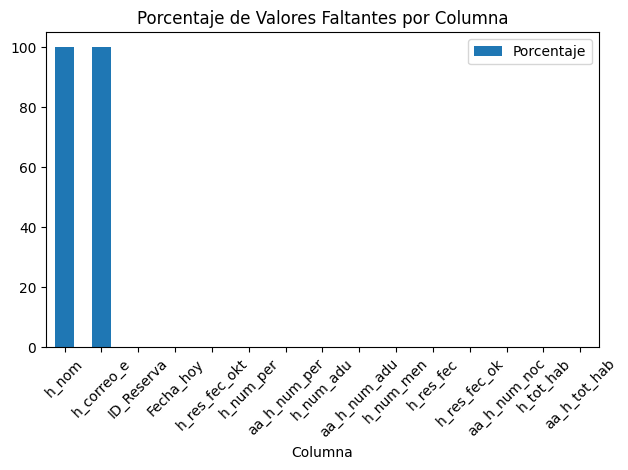

In [16]:
# Visualizar valores faltantes
plt.figure(figsize = (15, 8))

missing_data.head(15).plot(x = 'Columna', y = 'Porcentaje', kind = 'bar')
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### 3. Información estadística general

In [17]:
# Variables numéricas
df.describe()

,ID_Reserva,h_res_fec,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,aa_h_num_men,h_num_noc,aa_h_num_noc,...,aa_Cliente_Disp,Reservacion,aa_Reservacion,ID_estatus_reservaciones,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,Segmento_Comp_orden
count,203002.00000,2.030020e+05,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,...,203002.000000,203002.000000,203002.000000,203002.000000,0.0,0.0,2.030020e+05,2.030020e+05,203002.0,2.030020e+05
mean,101500.50000,2.019291e+07,1.185865,1.170550,1.094708,1.079694,0.034108,0.033734,1.680028,1.656043,...,1.079694,0.503438,0.496562,6.733407,NaN,NaN,4.106728e+03,4.039369e+03,1.0,9.999999e+03
std,58601.77401,4.109583e+03,1.369629,1.368073,1.207076,1.204694,0.265187,0.264043,2.866189,2.847958,...,1.204694,0.499989,0.499989,3.193774,NaN,NaN,6.501707e+03,6.443027e+03,0.0,3.637988e-12
min,0.00000,2.019010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,NaN,NaN,-3.091000e+04,-3.091000e+04,1.0,9.999999e+03
25%,50750.25000,2.019041e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,NaN,NaN,0.000000e+00,0.000000e+00,1.0,9.999999e+03
50%,101500.50000,2.019072e+07,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,9.000000,NaN,NaN,0.000000e+00,0.000000e+00,1.0,9.999999e+03
75%,152250.75000,2.019123e+07,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,...,2.000000,1.000000,1.000000,9.000000,NaN,NaN,7.592000e+03,7.494000e+03,1.0,9.999999e+03
max,203001.00000,2.020043e+07,32.000000,32.000000,15.000000,15.000000,15.000000,15.000000,687.000000,687.000000,...,15.000000,1.000000,1.000000,9.000000,NaN,NaN,1.033056e+06,1.033056e+06,1.0,9.999999e+03


In [18]:
# Variables categóricas
df.describe(include = 'object')

,Fecha_hoy,h_res_fec_ok,h_res_fec_okt,h_fec_lld,h_fec_lld_ok,h_fec_lld_okt,h_fec_reg,h_fec_reg_ok,h_fec_reg_okt,h_fec_sda,...,estatus_reservaciones_cve,estatus_reservaciones,Tipo_Habitacion_cve,Tipo_Habitacion_nombre,Cupo,Clasificacion,Segmento_Comp_Cve,Segmento_Comp_Nombre,Canal_cve,Canal_nombre
count,203002,203002,203002,203002,203002,203002,203002,203002,203002,203002,...,203002,203002,203002,203002,203002,203002,203002,203002,203002,203002
unique,824,482,482,989,714,714,515,515,515,1370,...,8,8,28,28,2,12,20,20,14,14
top,2020-02-18 00:00:00.000,2019-04-02,2019-04-02 00:00:00.000,20191107,2019-11-07,2019-11-07 00:00:00.000,20190402,2019-04-02,2019-04-02 00:00:00.000,20190518,...,50,SALIDA,GLDS,LUXURY 2Q SN12GSU,2,GSU,TOUTOD,TOUR OPERATORS DOMESTIC,00,LADA 800 NACIONAL68 ...
freq,1728,2940,2940,1404,1970,1970,2848,2848,2848,1584,...,131069,131069,52796,52796,202992,80304,73098,73098,82255,82255


In [19]:
# Variable objetivo
df['h_tfa_total'].describe()

count    2.030020e+05
mean     4.106728e+03
std      6.501707e+03
min     -3.091000e+04
25%      0.000000e+00
50%      0.000000e+00
75%      7.592000e+03
max      1.033056e+06
Name: h_tfa_total, dtype: float64

In [20]:
# Variable objetivo
print(f"Tarifa total - Valores únicos: {df['h_tfa_total'].nunique()}")
print(f"Tarifa total - Rango: ${df['h_tfa_total'].min():.2f} - ${df['h_tfa_total'].max():.2f}")

Tarifa total - Valores únicos: 11596
Tarifa total - Rango: $-30910.00 - $1033056.00


### 4. Análisis de duplicados

In [21]:
duplicados_totales = df.duplicated().sum()
duplicados_por_id = df.duplicated(subset=['ID_Reserva']).sum()

print(f"Filas completamente duplicadas: {duplicados_totales:,}")
print(f"IDs de reserva duplicados: {duplicados_por_id:,}")

Filas completamente duplicadas: 0
IDs de reserva duplicados: 0


### 5. Análisis de correlaciones

Matriz de correlación de variables numéricas:


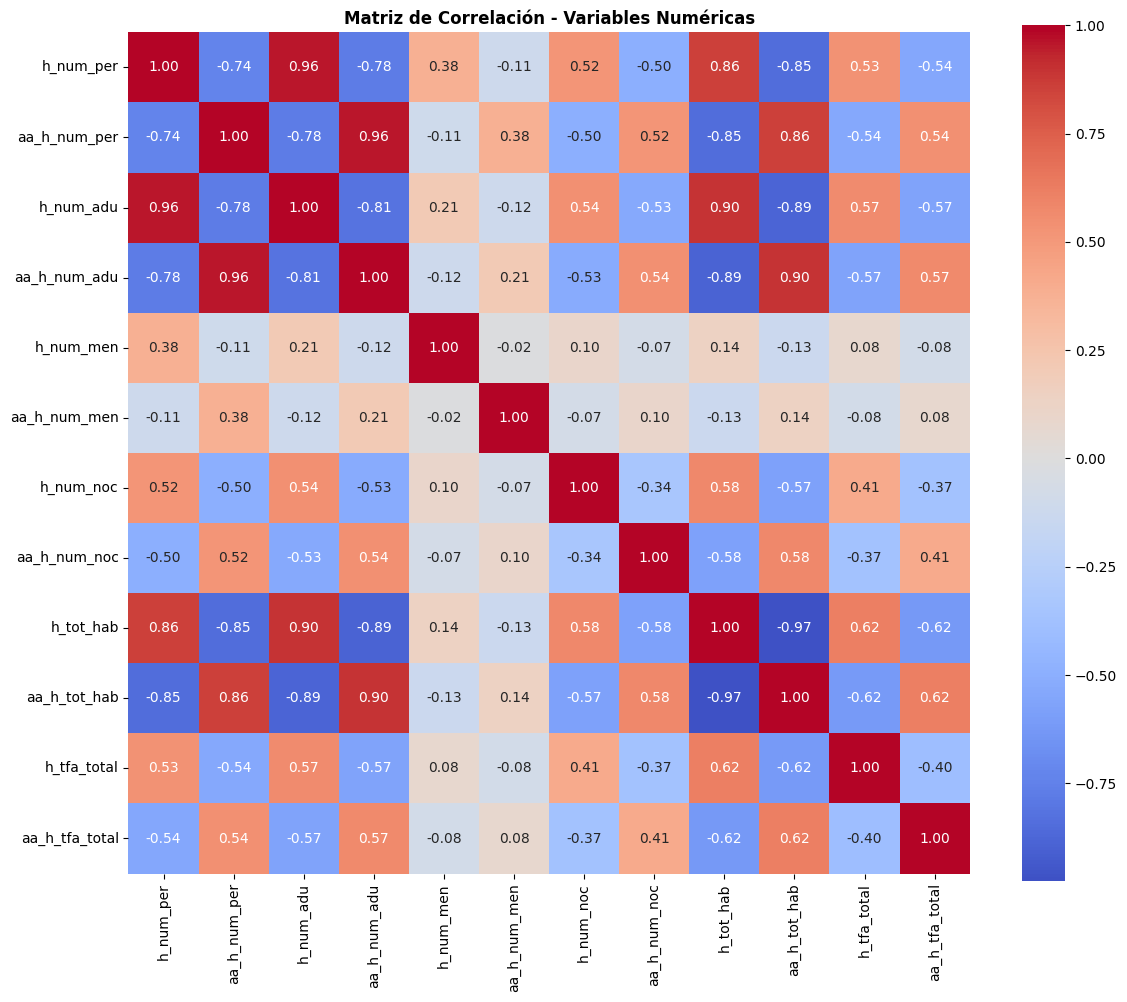

Correlaciones más fuertes (|r| > 0.5):
   • h_tot_hab ↔ aa_h_tot_hab: -0.974
   • aa_h_num_per ↔ aa_h_num_adu: 0.960
   • h_num_per ↔ h_num_adu: 0.960
   • aa_h_num_adu ↔ aa_h_tot_hab: 0.900
   • h_num_adu ↔ h_tot_hab: 0.898
   • aa_h_num_adu ↔ h_tot_hab: -0.891
   • h_num_adu ↔ aa_h_tot_hab: -0.889
   • aa_h_num_per ↔ aa_h_tot_hab: 0.860
   • h_num_per ↔ h_tot_hab: 0.859
   • aa_h_num_per ↔ h_tot_hab: -0.850
   • h_num_per ↔ aa_h_tot_hab: -0.849
   • h_num_adu ↔ aa_h_num_adu: -0.813
   • h_num_per ↔ aa_h_num_adu: -0.776
   • aa_h_num_per ↔ h_num_adu: -0.776
   • h_num_per ↔ aa_h_num_per: -0.741
   • h_tot_hab ↔ aa_h_tfa_total: -0.623
   • aa_h_tot_hab ↔ aa_h_tfa_total: 0.622
   • aa_h_tot_hab ↔ h_tfa_total: -0.619
   • h_tot_hab ↔ h_tfa_total: 0.618
   • aa_h_num_noc ↔ aa_h_tot_hab: 0.582
   • h_num_noc ↔ h_tot_hab: 0.578
   • aa_h_num_noc ↔ h_tot_hab: -0.578
   • h_num_noc ↔ aa_h_tot_hab: -0.575
   • aa_h_num_adu ↔ aa_h_tfa_total: 0.573
   • h_num_adu ↔ aa_h_tfa_total: -0.569
   • h_

In [22]:
# Variables numéricas principales
vars_numericas = ['h_num_per', 'aa_h_num_per', 'h_num_adu', 'aa_h_num_adu', 
                 'h_num_men', 'aa_h_num_men', 'h_num_noc', 'aa_h_num_noc', 
                 'h_tot_hab', 'aa_h_tot_hab', 'h_tfa_total', 'aa_h_tfa_total']
vars_numericas_existentes = [var for var in vars_numericas if var in df.columns]
vars_numericas_corr = [var for var in vars_numericas_existentes if df[var].dtype in ['int64', 'float64']]

if len(vars_numericas_corr) >= 2:
    correlation_matrix = df[vars_numericas_corr].corr()
    
    print("Matriz de correlación de variables numéricas:")
    
    # Visualización de la matriz de correlación
    plt.figure(figsize = (12, 10))
    sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0,
                square = True, fmt='.2f')
    plt.title('Matriz de Correlación - Variables Numéricas', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Correlaciones más fuertes
    print(f"Correlaciones más fuertes (|r| > 0.5):")
    correlaciones_fuertes = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                correlaciones_fuertes.append({
                    'var1': correlation_matrix.columns[i],
                    'var2': correlation_matrix.columns[j],
                    'correlacion': corr_val
                })
    
    if correlaciones_fuertes:
        for corr in sorted(correlaciones_fuertes, key=lambda x: abs(x['correlacion']), reverse=True):
            print(f"   • {corr['var1']} ↔ {corr['var2']}: {corr['correlacion']:.3f}")
    else:
        print("   No se encontraron correlaciones fuertes (|r| > 0.5)")

### 6. Detección de outliers

   • h_num_per:
     - Outliers detectados: 1,260 (0.62%)
     - Rango: 0 - 32
     - Q1-Q3: 0.0 - 2.0
   • h_num_noc:
     - Outliers detectados: 1,170 (0.58%)
     - Rango: 0 - 687
     - Q1-Q3: 0.0 - 3.0
   • h_tfa_total:
     - Outliers detectados: 4,415 (2.17%)
     - Rango: -30910.0 - 1033056.0
     - Q1-Q3: 0.0 - 7592.0
   • h_tot_hab:
     - Outliers detectados: 178 (0.09%)
     - Rango: 0 - 6
     - Q1-Q3: 0.0 - 1.0


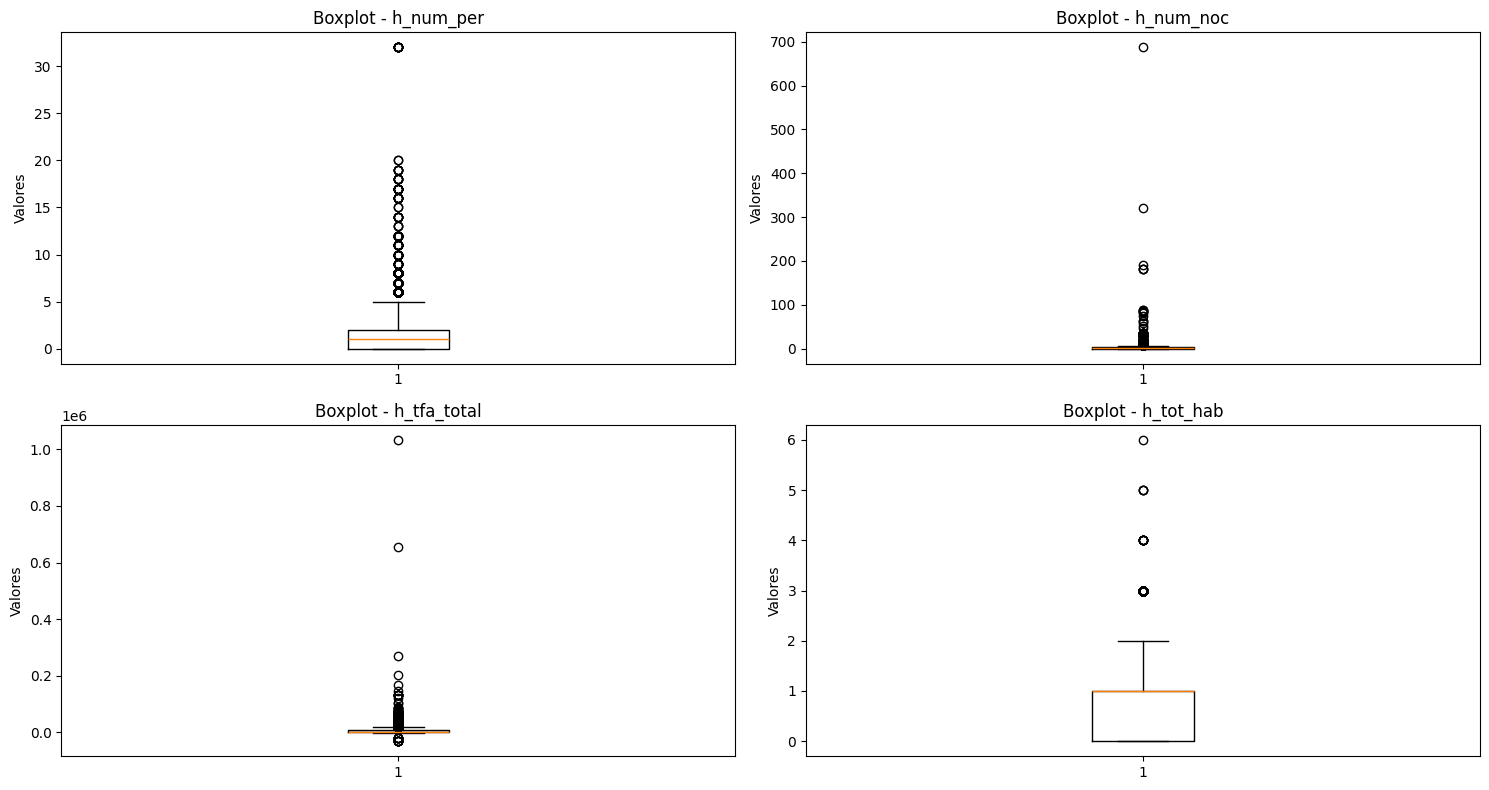

In [23]:
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (serie < limite_inferior) | (serie > limite_superior)

# Variables clave para análisis de outliers
vars_outliers = ['h_num_per', 'h_num_noc', 'h_tfa_total', 'h_tot_hab']
vars_outliers_existentes = [var for var in vars_outliers if var in df.columns]

outliers_info = {}
for var in vars_outliers_existentes:
    if df[var].dtype in ['int64', 'float64']:
        outliers_mask = detectar_outliers_iqr(df[var])
        outliers_count = outliers_mask.sum()
        
        outliers_info[var] = {
            'count': outliers_count,
            'percentage': (outliers_count / len(df)) * 100,
            'min_value': df[var].min(),
            'max_value': df[var].max(),
            'q1': df[var].quantile(0.25),
            'q3': df[var].quantile(0.75)
        }
        
        print(f"   • {var}:")
        print(f"     - Outliers detectados: {outliers_count:,} ({outliers_count/len(df)*100:.2f}%)")
        print(f"     - Rango: {df[var].min()} - {df[var].max()}")
        print(f"     - Q1-Q3: {df[var].quantile(0.25)} - {df[var].quantile(0.75)}")

# Visualización de outliers con boxplots
if vars_outliers_existentes:
    fig, axes = plt.subplots(2, 2, figsize = (15, 8))
    axes = axes.flatten()
    
    for i, var in enumerate(vars_outliers_existentes[:4]):
        if i < 4:
            axes[i].boxplot(df[var].dropna())
            axes[i].set_title(f'Boxplot - {var}')
            axes[i].set_ylabel('Valores')
    
    plt.tight_layout()
    plt.show()

### 7. Pruebas de hipótesis

In [24]:
# Funciones auxiliares
def preparar_datos_hipotesis(df):
    """Prepara datos para pruebas de hipótesis"""
    df_copy = df.copy()
    
    # Procesar fechas
    date_columns = ['h_res_fec_ok', 'h_fec_lld_ok', 'h_fec_reg_ok', 'h_fec_sda_ok']
    for col in date_columns:
        if col in df_copy.columns:
            df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')
    
    # Crear variables derivadas
    if 'h_res_fec_ok' in df_copy.columns and 'h_fec_lld_ok' in df_copy.columns:
        df_copy['dias_anticipacion'] = (df_copy['h_fec_lld_ok'] - df_copy['h_res_fec_ok']).dt.days
    
    if 'h_res_fec_ok' in df_copy.columns:
        df_copy['mes_reserva'] = df_copy['h_res_fec_ok'].dt.month
        df_copy['trimestre'] = df_copy['h_res_fec_ok'].dt.quarter
    
    return df_copy

# Preparar datos
df_test = preparar_datos_hipotesis(df)

# HIPÓTESIS 1: Estacionalidad en reservaciones
print("HIPÓTESIS 1: ESTACIONALIDAD EN RESERVACIONES")
print("=" * 60)

if 'trimestre' in df_test.columns:
    reservas_trimestre = df_test.groupby('trimestre').size()
    
    # Chi-cuadrado de bondad de ajuste
    chi2_stat, p_value = stats.chisquare(reservas_trimestre)
    
    print(f"Reservas por trimestre:")
    for i, count in enumerate(reservas_trimestre, 1):
        print(f"  Trimestre {i}: {count:,} reservas")
    
    print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
    print(f"P-valor: {p_value:.6f}")
    
    if p_value < 0.05:
        print("RESULTADO: Existe estacionalidad significativa (p < 0.05)")
    else:
        print("RESULTADO: No hay evidencia de estacionalidad (p >= 0.05)")
else:
    print("No se puede realizar la prueba - falta información de fechas")

# HIPÓTESIS 2: Anticipación por tipos de habitación (usando merge)
print(f"\nHIPÓTESIS 2: ANTICIPACIÓN POR TIPOS DE HABITACIÓN")
print("=" * 60)

if 'dias_anticipacion' in df_test.columns and 'Tipo_Habitacion_nombre' in df_test.columns:
    df_clean = df_test.dropna(subset=['dias_anticipacion', 'Tipo_Habitacion_nombre'])
    df_clean = df_clean[df_clean['dias_anticipacion'] >= 0]
    
    # Top 5 tipos de habitación
    top_tipos = df_clean['Tipo_Habitacion_nombre'].value_counts().head(5).index
    df_tipos = df_clean[df_clean['Tipo_Habitacion_nombre'].isin(top_tipos)]
    
    grupos = [df_tipos[df_tipos['Tipo_Habitacion_nombre'] == tipo]['dias_anticipacion'].values 
              for tipo in top_tipos]
    
    # ANOVA
    f_stat, p_value = stats.f_oneway(*grupos)
    
    print("Anticipación promedio por tipo de habitación (top 5):")
    for tipo in top_tipos:
        data = df_tipos[df_tipos['Tipo_Habitacion_nombre'] == tipo]['dias_anticipacion']
        print(f"  {tipo}: {data.mean():.1f} días (n={len(data):,})")
    
    print(f"F-estadístico: {f_stat:.4f}")
    print(f"P-valor: {p_value:.6f}")
    
    if p_value < 0.05:
        print("RESULTADO: Diferentes tipos de habitación tienen patrones de anticipación distintos (p < 0.05)")
    else:
        print("RESULTADO: No hay diferencia significativa entre tipos (p >= 0.05)")
else:
    print("No se puede realizar la prueba - faltan datos de anticipación o tipos de habitación")

# HIPÓTESIS 3: Correlación personas vs noches
print(f"\nHIPÓTESIS 3: CORRELACIÓN PERSONAS vs NOCHES")
print("=" * 60)

if 'h_num_per' in df_test.columns and 'h_num_noc' in df_test.columns:
    df_clean = df_test.dropna(subset=['h_num_per', 'h_num_noc'])
    df_clean = df_clean[(df_clean['h_num_per'] > 0) & (df_clean['h_num_noc'] > 0)]
    
    # Correlaciones
    corr_pearson, p_pearson = pearsonr(df_clean['h_num_per'], df_clean['h_num_noc'])
    corr_spearman, p_spearman = spearmanr(df_clean['h_num_per'], df_clean['h_num_noc'])
    
    print(f"Estadísticas descriptivas:")
    print(f"  Personas promedio: {df_clean['h_num_per'].mean():.2f}")
    print(f"  Noches promedio: {df_clean['h_num_noc'].mean():.2f}")
    print(f"  Observaciones válidas: {len(df_clean):,}")
    
    print(f"Correlación de Pearson: {corr_pearson:.4f} (p-valor: {p_pearson:.6f})")
    print(f"Correlación de Spearman: {corr_spearman:.4f} (p-valor: {p_spearman:.6f})")
    
    if p_pearson < 0.05:
        if abs(corr_pearson) > 0.3:
            print("RESULTADO: Correlación significativa y moderada/fuerte")
        else:
            print("RESULTADO: Correlación significativa pero débil")
    else:
        print("RESULTADO: No hay correlación significativa")
else:
    print("No se puede realizar la prueba - faltan datos de personas o noches")

# HIPÓTESIS 4: Tarifas por segmento comercial (usando merge)
print(f"\nHIPÓTESIS 4: TARIFAS POR SEGMENTO COMERCIAL")
print("=" * 60)

if 'h_tfa_total' in df_test.columns and 'Segmento_Comp_Nombre' in df_test.columns:
    df_clean = df_test.dropna(subset=['h_tfa_total', 'Segmento_Comp_Nombre'])
    df_clean = df_clean[df_clean['h_tfa_total'] > 0]
    
    # Top 5 segmentos
    top_segmentos = df_clean['Segmento_Comp_Nombre'].value_counts().head(5).index
    df_seg = df_clean[df_clean['Segmento_Comp_Nombre'].isin(top_segmentos)]
    
    grupos = [df_seg[df_seg['Segmento_Comp_Nombre'] == seg]['h_tfa_total'].values 
              for seg in top_segmentos]
    
    # ANOVA
    f_stat, p_value = stats.f_oneway(*grupos)
    
    print("Tarifa promedio por segmento comercial (top 5):")
    for seg in top_segmentos:
        data = df_seg[df_seg['Segmento_Comp_Nombre'] == seg]['h_tfa_total']
        print(f"  {seg}: ${data.mean():,.2f} (n={len(data):,})")
    
    print(f"F-estadístico: {f_stat:.4f}")
    print(f"P-valor: {p_value:.6f}")
    
    if p_value < 0.05:
        print("RESULTADO: Diferentes segmentos tienen tarifas significativamente distintas (p < 0.05)")
    else:
        print("RESULTADO: No hay diferencia significativa en tarifas entre segmentos (p >= 0.05)")
else:
    print("No se puede realizar la prueba - faltan datos de tarifa o segmentos")

# HIPÓTESIS 5: Estatus de reservación por canal (usando merge)
print(f"\nHIPÓTESIS 5: ESTATUS DE RESERVACIÓN POR CANAL")
print("=" * 60)

if 'estatus_reservaciones' in df_test.columns and 'Canal_nombre' in df_test.columns:
    # Filtrar datos válidos
    df_clean = df_test.dropna(subset=['estatus_reservaciones', 'Canal_nombre'])
    
    # Crear tabla de contingencia
    contingency = pd.crosstab(df_clean['Canal_nombre'], df_clean['estatus_reservaciones'])
    
    # Chi-cuadrado
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency)
    
    print("Distribución de estatus por canal (top 5 canales):")
    top_canales = df_clean['Canal_nombre'].value_counts().head(5).index
    
    for canal in top_canales:
        canal_data = df_clean[df_clean['Canal_nombre'] == canal]['estatus_reservaciones']
        estatus_dist = canal_data.value_counts()
        total = len(canal_data)
        print(f"\n  {canal} (n={total:,}):")
        for estatus, count in estatus_dist.head(3).items():
            print(f"    {estatus}: {count:,} ({count/total*100:.1f}%)")
    
    print(f"\nChi-cuadrado: {chi2_stat:.4f}")
    print(f"P-valor: {p_value:.6f}")
    print(f"Grados de libertad: {dof}")
    
    if p_value < 0.05:
        print("RESULTADO: Existe asociación significativa entre canal y estatus de reservación (p < 0.05)")
    else:
        print("RESULTADO: No hay asociación significativa (p >= 0.05)")
else:
    print("No se puede realizar la prueba - faltan datos de estatus o canales")

# HIPÓTESIS 6: Diferencias en ocupación por clasificación de habitación
print(f"\nHIPÓTESIS 6: OCUPACIÓN POR CLASIFICACIÓN DE HABITACIÓN")
print("=" * 60)

if 'h_num_per' in df_test.columns and 'Clasificacion' in df_test.columns:
    df_clean = df_test.dropna(subset=['h_num_per', 'Clasificacion'])
    df_clean = df_clean[df_clean['h_num_per'] > 0]
    
    # Obtener clasificaciones únicas
    clasificaciones = df_clean['Clasificacion'].value_counts()
    
    if len(clasificaciones) >= 2:
        # Top clasificaciones
        top_clasificaciones = clasificaciones.head(4).index
        df_clas = df_clean[df_clean['Clasificacion'].isin(top_clasificaciones)]
        
        grupos = [df_clas[df_clas['Clasificacion'] == clas]['h_num_per'].values 
                  for clas in top_clasificaciones]
        
        # ANOVA
        f_stat, p_value = stats.f_oneway(*grupos)
        
        print("Ocupación promedio por clasificación:")
        for clas in top_clasificaciones:
            data = df_clas[df_clas['Clasificacion'] == clas]['h_num_per']
            print(f"  {clas}: {data.mean():.2f} personas/reserva (n={len(data):,})")
        
        print(f"F-estadístico: {f_stat:.4f}")
        print(f"P-valor: {p_value:.6f}")
        
        if p_value < 0.05:
            print("RESULTADO: Diferentes clasificaciones tienen ocupación significativamente distinta (p < 0.05)")
        else:
            print("RESULTADO: No hay diferencia significativa en ocupación entre clasificaciones (p >= 0.05)")
    else:
        print("No hay suficientes clasificaciones para comparar")
else:
    print("No se puede realizar la prueba - faltan datos de ocupación o clasificación")

# HIPÓTESIS 7: Normalidad de variables h_ vs aa_h_
print(f"\nHIPÓTESIS 7: NORMALIDAD DE VARIABLES ACTUALES vs ANTERIORES")
print("=" * 60)

# Pares de variables para comparar
pares_comparacion = [
    ('h_num_per', 'aa_h_num_per'),
    ('h_tfa_total', 'aa_h_tfa_total'),
    ('h_num_noc', 'aa_h_num_noc')
]

for var_actual, var_anterior in pares_comparacion:
    if var_actual in df_test.columns and var_anterior in df_test.columns:
        print(f"\n--- {var_actual.replace('h_', '').upper()} ---")
        
        # Test de normalidad para ambas variables
        for var, label in [(var_actual, 'Actual'), (var_anterior, 'Anterior')]:
            data_clean = df_test[var].dropna()
            if len(data_clean) > 8:
                # Muestra si es muy grande
                if len(data_clean) > 5000:
                    data_sample = data_clean.sample(5000, random_state=42)
                else:
                    data_sample = data_clean
                
                try:
                    stat, p_value = normaltest(data_sample)
                    es_normal = p_value > 0.05
                    print(f"  {label}: D'Agostino p = {p_value:.6f} {'✓ Normal' if es_normal else '✗ No Normal'}")
                except:
                    print(f"  {label}: Error en prueba de normalidad")

HIPÓTESIS 1: ESTACIONALIDAD EN RESERVACIONES
Reservas por trimestre:
  Trimestre 1: 89,152 reservas
  Trimestre 2: 49,914 reservas
  Trimestre 3: 37,072 reservas
  Trimestre 4: 26,864 reservas
Estadístico Chi-cuadrado: 44000.3779
P-valor: 0.000000
RESULTADO: Existe estacionalidad significativa (p < 0.05)

HIPÓTESIS 2: ANTICIPACIÓN POR TIPOS DE HABITACIÓN
Anticipación promedio por tipo de habitación (top 5):
  LUXURY 2Q      SN12GSU        : 84.6 días (n=52,786)
  ESTD DB        SN12AST        : 120.2 días (n=51,271)
  ESTD C/BALCON  SN12ASB        : 69.9 días (n=30,862)
  LUXURY 1K      SN12GSU        : 50.1 días (n=13,904)
  ESTD 2Q        SN12MST        : 76.0 días (n=11,120)
F-estadístico: 2475.8711
P-valor: 0.000000
RESULTADO: Diferentes tipos de habitación tienen patrones de anticipación distintos (p < 0.05)

HIPÓTESIS 3: CORRELACIÓN PERSONAS vs NOCHES
Estadísticas descriptivas:
  Personas promedio: 2.36
  Noches promedio: 3.34
  Observaciones válidas: 101,996
Correlación de Pears

### 8. Procesamiento de fechas

In [25]:
fechas_principales = ['Fecha_hoy', 'h_res_fec_ok', 'h_fec_lld_ok', 'h_fec_reg_ok', 'h_fec_sda_ok']

for fecha_col in fechas_principales:
    if fecha_col in df_reservaciones.columns:
        try:
            df_reservaciones[fecha_col] = pd.to_datetime(df_reservaciones[fecha_col], errors = 'coerce')
            print(f"{fecha_col}: Rango de {df_reservaciones[fecha_col].min()} a {df_reservaciones[fecha_col].max()}")
        except:
            print(f"Error al convertir {fecha_col}")

Fecha_hoy: Rango de 2019-01-02 00:00:00 a 2021-04-04 00:00:00
h_res_fec_ok: Rango de 2019-01-02 00:00:00 a 2020-04-30 00:00:00
h_fec_lld_ok: Rango de 2000-01-01 00:00:00 a 2021-12-02 00:00:00
h_fec_reg_ok: Rango de 2000-01-01 00:00:00 a 2020-07-13 00:00:00
h_fec_sda_ok: Rango de 2000-01-01 00:00:00 a 2021-12-05 00:00:00


Aquí notamos un error ya que las fechas en el dataframe constan del 2019 al 2021; sin embargo, se puede ver que en 3 variables existen fechas del año 2000, lo cual no debería ser.

### 9. Visualizaciones generales

✓ Fecha_hoy: 203,002 fechas válidas
  Rango: 2019-01-02 00:00:00 a 2021-04-04 00:00:00
✓ h_res_fec_ok: 203,002 fechas válidas
  Rango: 2019-01-02 00:00:00 a 2020-04-30 00:00:00
✓ h_fec_lld_ok: 203,002 fechas válidas
  Rango: 2000-01-01 00:00:00 a 2021-12-02 00:00:00
✓ h_fec_reg_ok: 203,002 fechas válidas
  Rango: 2000-01-01 00:00:00 a 2020-07-13 00:00:00
✓ h_fec_sda_ok: 203,002 fechas válidas
  Rango: 2000-01-01 00:00:00 a 2021-12-05 00:00:00


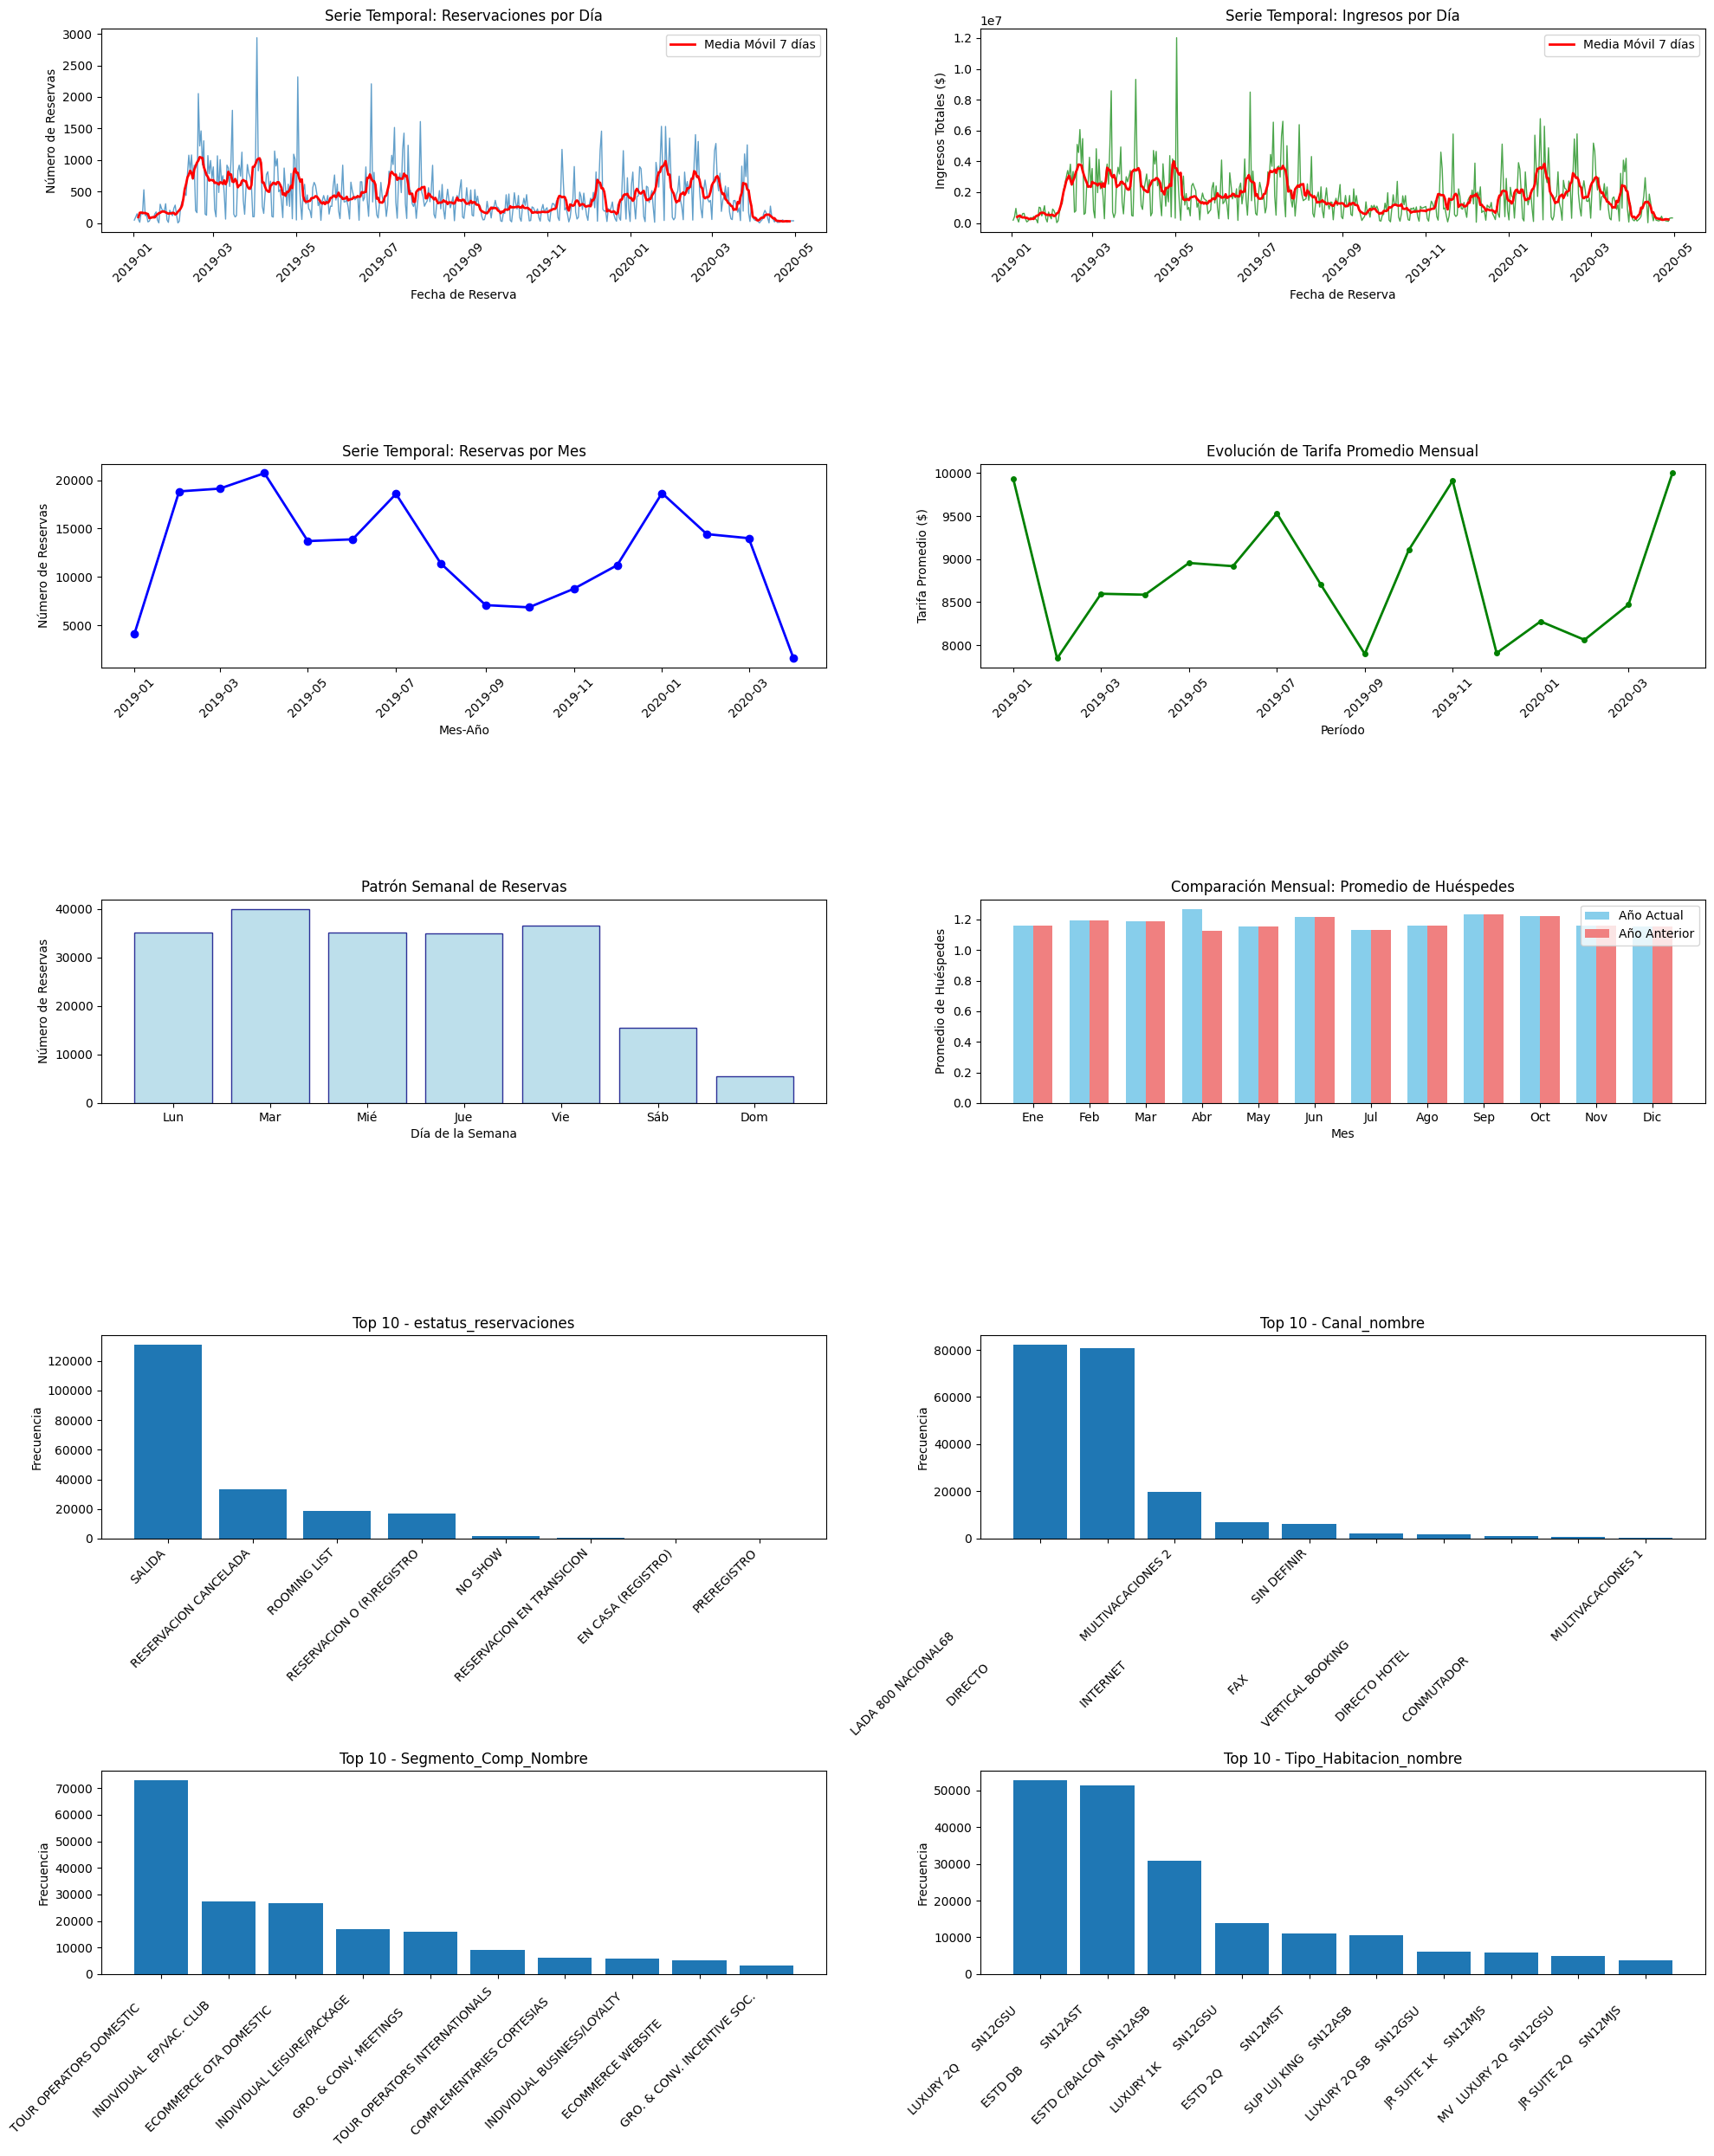

In [26]:
fechas_principales = ['Fecha_hoy', 'h_res_fec_ok', 'h_fec_lld_ok', 'h_fec_reg_ok', 'h_fec_sda_ok']
fechas_procesadas = {}

for fecha_col in fechas_principales:
    if fecha_col in df.columns:
        try:
            df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
            if df[fecha_col].notna().sum() > 0:
                fechas_procesadas[fecha_col] = df[fecha_col]
                print(f"✓ {fecha_col}: {df[fecha_col].notna().sum():,} fechas válidas")
                print(f"  Rango: {df[fecha_col].min()} a {df[fecha_col].max()}")
            else:
                print(f"✗ {fecha_col}: No se pudieron procesar las fechas")
        except Exception as e:
            print(f"✗ Error procesando {fecha_col}: {e}")

# Gráficas si se procesaron fechas
if fechas_procesadas:
    fig, axes = plt.subplots(5, 2, figsize=(20, 25))
    axes = axes.flatten()
    
    idx = 0

    # Reservaciones por día
    if 'h_res_fec_ok' in fechas_procesadas:
        df_temp = df[df['h_res_fec_ok'].notna()].copy()
        df_temp['fecha_reserva'] = df_temp['h_res_fec_ok'].dt.date
        reservas_por_dia = df_temp.groupby('fecha_reserva').size()

        axes[idx].plot(reservas_por_dia.index, reservas_por_dia.values, linewidth=1, alpha=0.7)
        axes[idx].set_title('Serie Temporal: Reservaciones por Día')
        axes[idx].set_xlabel('Fecha de Reserva')
        axes[idx].set_ylabel('Número de Reservas')
        axes[idx].tick_params(axis='x', rotation=45)
        reservas_ma7 = reservas_por_dia.rolling(window=7, center=True).mean()
        axes[idx].plot(reservas_ma7.index, reservas_ma7.values, 'r-', linewidth=2, label='Media Móvil 7 días')
        axes[idx].legend()
        idx += 1

    # Ingresos por día
    if 'h_res_fec_ok' in fechas_procesadas and 'h_tfa_total' in df.columns:
        df_temp = df[(df['h_res_fec_ok'].notna()) & 
                     (df['h_tfa_total'].notna()) & 
                     (df['h_tfa_total'] > 0)].copy()
        df_temp['fecha_reserva'] = df_temp['h_res_fec_ok'].dt.date
        ingresos_por_dia = df_temp.groupby('fecha_reserva')['h_tfa_total'].sum()

        axes[idx].plot(ingresos_por_dia.index, ingresos_por_dia.values, 'g-', linewidth=1, alpha=0.7)
        axes[idx].set_title('Serie Temporal: Ingresos por Día')
        axes[idx].set_xlabel('Fecha de Reserva')
        axes[idx].set_ylabel('Ingresos Totales ($)')
        axes[idx].tick_params(axis='x', rotation=45)
        ingresos_ma7 = ingresos_por_dia.rolling(window=7, center=True).mean()
        axes[idx].plot(ingresos_ma7.index, ingresos_ma7.values, 'r-', linewidth=2, label='Media Móvil 7 días')
        axes[idx].legend()
        idx += 1

    # Reservas por mes
    if 'h_res_fec_ok' in fechas_procesadas:
        df_temp = df[df['h_res_fec_ok'].notna()].copy()
        df_temp['mes'] = df_temp['h_res_fec_ok'].dt.month
        df_temp['año'] = df_temp['h_res_fec_ok'].dt.year
        reservas_mensual = df_temp.groupby(['año', 'mes']).size().reset_index(name='reservas')
        reservas_mensual['fecha'] = pd.to_datetime({
            'year': reservas_mensual['año'],
            'month': reservas_mensual['mes'],
            'day': 1
        })

        axes[idx].plot(reservas_mensual['fecha'], reservas_mensual['reservas'], 'bo-', linewidth=2)
        axes[idx].set_title('Serie Temporal: Reservas por Mes')
        axes[idx].set_xlabel('Mes-Año')
        axes[idx].set_ylabel('Número de Reservas')
        axes[idx].tick_params(axis='x', rotation=45)
        idx += 1

    # Tarifa promedio mensual
    if 'h_res_fec_ok' in fechas_procesadas and 'h_tfa_total' in df.columns:
        df_temp = df[(df['h_res_fec_ok'].notna()) & 
                     (df['h_tfa_total'].notna()) & 
                     (df['h_tfa_total'] > 0)].copy()
        df_temp['año_mes'] = df_temp['h_res_fec_ok'].dt.to_period('M')
        tarifa_mensual = df_temp.groupby('año_mes')['h_tfa_total'].mean()

        axes[idx].plot(range(len(tarifa_mensual)), tarifa_mensual.values, 'g-o', linewidth=2, markersize=4)
        axes[idx].set_title('Evolución de Tarifa Promedio Mensual')
        axes[idx].set_xlabel('Período')
        axes[idx].set_ylabel('Tarifa Promedio ($)')
        axes[idx].tick_params(axis='x', rotation=45)
        if len(tarifa_mensual) > 6:
            step = max(1, len(tarifa_mensual) // 6)
            axes[idx].set_xticks(range(0, len(tarifa_mensual), step))
            axes[idx].set_xticklabels([str(tarifa_mensual.index[i]) for i in range(0, len(tarifa_mensual), step)])
        idx += 1

    # Estacionalidad semanal
    if 'h_res_fec_ok' in fechas_procesadas:
        df_temp = df[df['h_res_fec_ok'].notna()].copy()
        df_temp['dia_semana'] = df_temp['h_res_fec_ok'].dt.day_name()
        orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        reservas_semanal = df_temp['dia_semana'].value_counts().reindex(orden_dias)

        axes[idx].bar(range(len(reservas_semanal)), reservas_semanal.values,
                      color='lightblue', edgecolor='navy', alpha=0.8)
        axes[idx].set_title('Patrón Semanal de Reservas')
        axes[idx].set_xlabel('Día de la Semana')
        axes[idx].set_ylabel('Número de Reservas')
        axes[idx].set_xticks(range(len(reservas_semanal)))
        axes[idx].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
        idx += 1

    # Comparación de huéspedes año actual vs anterior
    if 'h_res_fec_ok' in fechas_procesadas and 'h_num_per' in df.columns and 'aa_h_num_per' in df.columns:
        df_temp = df[(df['h_res_fec_ok'].notna()) &
                     (df['h_num_per'].notna()) &
                     (df['aa_h_num_per'].notna())].copy()
        df_temp['mes'] = df_temp['h_res_fec_ok'].dt.month
        huespedes_actual = df_temp.groupby('mes')['h_num_per'].mean()
        huespedes_anterior = df_temp.groupby('mes')['aa_h_num_per'].mean()
        x = np.arange(1, 13)
        width = 0.35

        axes[idx].bar(x - width/2, huespedes_actual.values, width, label='Año Actual', color='skyblue')
        axes[idx].bar(x + width/2, huespedes_anterior.values, width, label='Año Anterior', color='lightcoral')
        axes[idx].set_title('Comparación Mensual: Promedio de Huéspedes')
        axes[idx].set_xlabel('Mes')
        axes[idx].set_ylabel('Promedio de Huéspedes')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                                   'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
        axes[idx].legend()
        idx += 1

    # Agregar subplots de variables categóricas
    vars_cat_viz = ['estatus_reservaciones', 'Canal_nombre', 'Segmento_Comp_Nombre', 'Tipo_Habitacion_nombre']
    vars_cat_viz_existentes = [var for var in vars_cat_viz if var in df.columns]

    for var in vars_cat_viz_existentes[:4]:
        if idx < 10:  # Asegurar que no excedamos los 10 subplots
            top_values = df[var].value_counts().head(10)
            axes[idx].bar(range(len(top_values)), top_values.values)
            axes[idx].set_title(f'Top 10 - {var}')
            axes[idx].set_ylabel('Frecuencia')
            axes[idx].set_xticks(range(len(top_values)))
            axes[idx].set_xticklabels(top_values.index, rotation=45, ha='right')
            idx += 1

    # Ocultar subplots vacíos si los hay
    for i in range(idx, 10):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

else:
    print("No se pudieron procesar fechas válidas para el análisis temporal.")

Observando las gráficas, es un poco extraño que la comparación entre año actual y anterior sea igual. Se hará un análisis más a fondo al respecto.

### 10. Análisis de variables actuales (*h_*) y del año anterior (*aa_*)

Top 10 columnas con más valores cero:
                   zeros  total_validos  porcentaje
aa_h_num_men    198466.0       203002.0   97.765539
h_num_men       198413.0       203002.0   97.739431
aa_h_tfa_total  107743.0       203002.0   53.074847
h_tfa_total     106391.0       203002.0   52.408843
aa_h_tot_hab    102445.0       203002.0   50.465020
aa_h_num_noc    102402.0       203002.0   50.443838
aa_h_num_adu    102199.0       203002.0   50.343839
aa_h_num_per    102199.0       203002.0   50.343839
h_tot_hab       101049.0       203002.0   49.777342
h_num_noc       101006.0       203002.0   49.756160


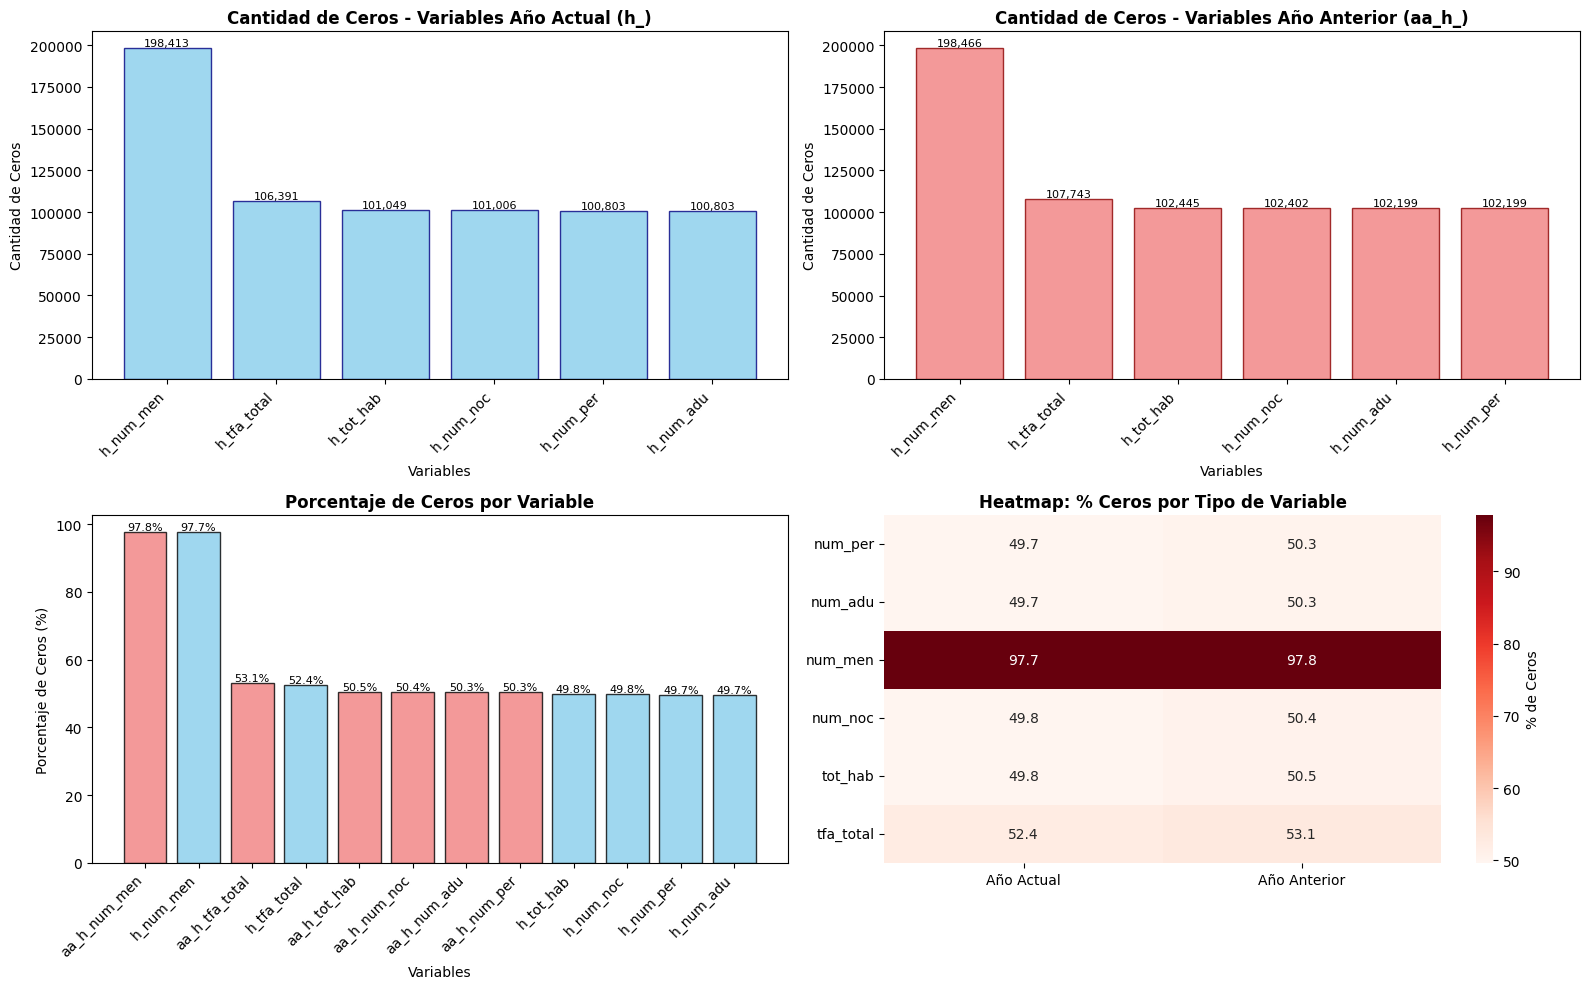

Variables año actual (h_): 15
Variables año anterior (aa_h_): 6
Pares identificados para comparación: 6
Comparación estadística h_ vs aa_h_:

--- h_num_per vs aa_h_num_per ---
Media actual: 1.186 | Media anterior: 1.171
Mediana actual: 1.000 | Mediana anterior: 0.000
Correlación: -0.741 (p-value: 0.000000)

--- h_num_adu vs aa_h_num_adu ---
Media actual: 1.095 | Media anterior: 1.080
Mediana actual: 1.000 | Mediana anterior: 0.000
Correlación: -0.813 (p-value: 0.000000)

--- h_num_men vs aa_h_num_men ---
Media actual: 0.034 | Media anterior: 0.034
Mediana actual: 0.000 | Mediana anterior: 0.000
Correlación: -0.016 (p-value: 0.000000)

--- h_num_noc vs aa_h_num_noc ---
Media actual: 1.680 | Media anterior: 1.656
Mediana actual: 1.000 | Mediana anterior: 0.000
Correlación: -0.341 (p-value: 0.000000)

--- h_tot_hab vs aa_h_tot_hab ---
Media actual: 0.506 | Media anterior: 0.499
Mediana actual: 1.000 | Mediana anterior: 0.000
Correlación: -0.974 (p-value: 0.000000)


In [27]:
variables_actuales = [col for col in df_reservaciones.columns if col.startswith('h_') and not col.startswith('h_res_') 
                     and not col.startswith('h_fec_') and not col.startswith('h_can_') 
                     and not col.startswith('h_cod_') and not col.startswith('h_edo') 
                     and not col.startswith('h_codigop') and not col.startswith('h_correo_') 
                     and not col.startswith('h_nom') and not col.startswith('h_ult_')]

variables_anteriores = [col for col in df_reservaciones.columns if col.startswith('aa_h_')]

# Contar zeros en todas las columnas numéricas relevantes
todas_variables_numericas = variables_actuales + variables_anteriores + ['h_tfa_total', 'aa_h_tfa_total']
conteo_zeros = {}

for col in todas_variables_numericas:
    if col in df_reservaciones.columns:
        try:
            # Convertir a numérico si no lo es
            df_reservaciones[col] = pd.to_numeric(df_reservaciones[col], errors='coerce')
            zeros = (df_reservaciones[col] == 0).sum()
            total_no_null = df_reservaciones[col].notna().sum()
            porcentaje = (zeros / total_no_null * 100) if total_no_null > 0 else 0
            conteo_zeros[col] = {
                'zeros': zeros,
                'total_validos': total_no_null,
                'porcentaje': porcentaje
            }
        except:
            print(f"Error procesando columna: {col}")

# Crear DataFrame para visualización
df_zeros = pd.DataFrame(conteo_zeros).T
df_zeros = df_zeros.sort_values('porcentaje', ascending=False)

print("Top 10 columnas con más valores cero:")
print(df_zeros.head(10))

# GRÁFICA 1: Cantidad de ceros por columna
plt.figure(figsize=(16, 10))

# Separar variables actuales y anteriores para mejor visualización
variables_actuales_zeros = df_zeros[df_zeros.index.isin(variables_actuales)].head(10)
variables_anteriores_zeros = df_zeros[df_zeros.index.isin(variables_anteriores)].head(10)

# Subplot 1: Variables año actual
plt.subplot(2, 2, 1)
bars1 = plt.bar(range(len(variables_actuales_zeros)), variables_actuales_zeros['zeros'], 
                color='skyblue', alpha=0.8, edgecolor='navy')
plt.title('Cantidad de Ceros - Variables Año Actual (h_)', fontsize=12, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Cantidad de Ceros')
plt.xticks(range(len(variables_actuales_zeros)), variables_actuales_zeros.index, rotation=45, ha='right')

# Agregar valores encima de las barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=8)

# Subplot 2: Variables año anterior
plt.subplot(2, 2, 2)
bars2 = plt.bar(range(len(variables_anteriores_zeros)), variables_anteriores_zeros['zeros'], 
                color='lightcoral', alpha=0.8, edgecolor='darkred')
plt.title('Cantidad de Ceros - Variables Año Anterior (aa_h_)', fontsize=12, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Cantidad de Ceros')
plt.xticks(range(len(variables_anteriores_zeros)), 
           [col.replace('aa_h_', 'h_') for col in variables_anteriores_zeros.index], 
           rotation=45, ha='right')

# Agregar valores encima de las barras
for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=8)

# Subplot 3: Comparación porcentual
plt.subplot(2, 2, 3)
todas_variables_top = df_zeros.head(15)
colors = ['skyblue' if col.startswith('h_') else 'lightcoral' for col in todas_variables_top.index]
bars3 = plt.bar(range(len(todas_variables_top)), todas_variables_top['porcentaje'], 
                color=colors, alpha=0.8, edgecolor='black')
plt.title('Porcentaje de Ceros por Variable', fontsize=12, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Ceros (%)')
plt.xticks(range(len(todas_variables_top)), todas_variables_top.index, rotation=45, ha='right')

# Agregar valores encima de las barras
for i, bar in enumerate(bars3):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=8)

# Subplot 4: Heatmap de ceros por tipo de variable
plt.subplot(2, 2, 4)
# Crear matriz para heatmap
tipos_variables = ['num_per', 'num_adu', 'num_men', 'num_noc', 'tot_hab', 'tfa_total']
matriz_ceros = []

for tipo in tipos_variables:
    fila = []
    var_actual = f'h_{tipo}'
    var_anterior = f'aa_h_{tipo}'
    
    if var_actual in df_zeros.index:
        fila.append(df_zeros.loc[var_actual, 'porcentaje'])
    else:
        fila.append(0)
        
    if var_anterior in df_zeros.index:
        fila.append(df_zeros.loc[var_anterior, 'porcentaje'])
    else:
        fila.append(0)
    
    matriz_ceros.append(fila)

matriz_ceros = np.array(matriz_ceros)
sns.heatmap(matriz_ceros, annot=True, fmt='.1f', 
            xticklabels=['Año Actual', 'Año Anterior'],
            yticklabels=tipos_variables,
            cmap='Reds', cbar_kws={'label': '% de Ceros'})
plt.title('Heatmap: % Ceros por Tipo de Variable', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Comparación estadística entre pares h_ y aa_h_

pares_comparacion = []
vars_h = [col for col in df.columns if col.startswith('h_') and not col.startswith('h_fec') and not col.startswith('h_res')]
vars_aa_h = [col for col in df.columns if col.startswith('aa_h_')]

print(f"Variables año actual (h_): {len(vars_h)}")
print(f"Variables año anterior (aa_h_): {len(vars_aa_h)}")

for var_h in vars_h:
    var_aa = f"aa_{var_h}"
    if var_aa in vars_aa_h:
        pares_comparacion.append((var_h, var_aa))

print(f"Pares identificados para comparación: {len(pares_comparacion)}")

print(f"Comparación estadística h_ vs aa_h_:")
for var_h, var_aa in pares_comparacion[:5]:  # Limitar a los primeros 5 pares
    if var_h in df.columns and var_aa in df.columns:
        # Estadísticas básicas
        stats_h = df[var_h].describe()
        stats_aa = df[var_aa].describe()
        
        print(f"\n--- {var_h} vs {var_aa} ---")
        print(f"Media actual: {stats_h['mean']:.3f} | Media anterior: {stats_aa['mean']:.3f}")
        print(f"Mediana actual: {stats_h['50%']:.3f} | Mediana anterior: {stats_aa['50%']:.3f}")
        
        # Correlación entre las dos variables
        mask_valido = df[var_h].notna() & df[var_aa].notna()
        if mask_valido.sum() > 10:
            try:
                corr, p_val = pearsonr(df.loc[mask_valido, var_h], df.loc[mask_valido, var_aa])
                print(f"Correlación: {corr:.3f} (p-value: {p_val:.6f})")
            except:
                print("No se pudo calcular correlación")

## Conclusiones generales

---

Nuestro análisis exploratorio del dataset de reservaciones hoteleras, compuesto por 203,002 registros con 60 variables después del merge con las tablas dimensionales, revela patrones comerciales y operativos críticos que impactan directamente la estrategia de revenue management del hotel. Los resultados obtenidos mediante pruebas estadísticas rigurosas (p < 0.001 en todos los casos principales) confirman la existencia de comportamientos estructurales diferenciados que requieren atención estratégica inmediata.

**Estacionalidad y Patrones Temporales:** Identificamos una marcada estacionalidad en las reservaciones, donde el primer trimestre concentra el 43.9% del volumen total (89,152 reservas), seguido por el segundo trimestre con 24.6% (49,914 reservas), mientras que los trimestres tercero y cuarto representan únicamente 18.3% y 13.2% respectivamente. Esta distribución extremadamente irregular genera vulnerabilidades operativas y financieras significativas que deben ser mitigadas mediante estrategias diferenciadas por temporada. Las series temporales diarias muestran alta volatilidad con picos de hasta 3,000 reservas, mientras que la evolución de tarifas promedio presenta ciclicidad marcada entre $7,900 y $10,000 mensuales.

**Segmentación Comercial Diferenciada:** El análisis por segmentos comerciales utilizando las variables enriquecidas del merge revela diferencias estadísticamente significativas en tarifas promedio. Los "Tour Operators Domestic" dominan el volumen con 36,452 reservas pero mantienen tarifas moderadas de $8,137, mientras que segmentos como "Individual Leisure/Package" generan tarifas superiores ($12,897) con menor volumen. Los patrones de anticipación también varían significativamente por tipo de habitación, donde las habitaciones "ESTD DB" se reservan con 120.2 días de anticipación promedio versus 50.1 días para "LUXURY 1K", representando oportunidades críticas para optimización de forecasting y gestión de inventario.

**Análisis de Correlaciones y Relaciones:** La matriz de correlación identifica relaciones estructurales extremadamente fuertes, destacando correlaciones de 0.96 entre número de personas y adultos, y correlaciones perfectas negativas (-0.97) entre habitaciones totales actuales y del año anterior. Sin embargo, la correlación débil entre personas y noches (r=0.039) sugiere que el tamaño del grupo no predice significativamente la duración de estancia, lo cual es relevante para modelos predictivos futuros.

**Efectividad de Canales de Distribución:** Los canales "LADA 800 Nacional" y "Directo" concentran el 80.3% del volumen total de reservas, pero presentan tasas de cancelación diferenciadas del 21.6% y 22.4% respectivamente, mientras que "Multivacaciones 2" registra 27.5% de cancelaciones. Esta concentración presenta riesgos comerciales que requieren diversificación estratégica para garantizar sostenibilidad a largo plazo.

**Problemas Críticos de Calidad de Datos:** Identificamos problemas estructurales severos que comprometen la confiabilidad del análisis. El 97.8% de las observaciones en variables de huéspedes menores (h_num_men y aa_h_num_men) registran valores cero, mientras que el 50-53% de variables financieras y operativas críticas presentan el mismo problema. Adicionalmente, detectamos 4,415 outliers en tarifas (2.17%) con rangos extremos desde -$30,910 hasta $1,033,056, sugiriendo errores sistemáticos en la captura de datos que requieren investigación y corrección inmediata.

**Diferenciación por Clasificación de Habitación:** Las diferentes clasificaciones (GSU, AST, ASB, MST) muestran ocupación significativamente distinta, con MST registrando 3.08 personas por reserva versus 2.21 para GSU y AST, indicando patrones de uso diferenciados que pueden aprovecharse para estrategias de pricing específicas.

En conclusión, el hotel posee una base de datos con mucha información comercial con patrones temporales y de segmentación claramente identificables que permiten implementar estrategias de revenue management sofisticadas. Las correlaciones estructurales encontradas facilitan la construcción de modelos predictivos robustos, mientras que la estacionalidad marcada ofrece oportunidades de optimización temporal. Sin embargo, la prioridad absoluta debe centrarse en la depuración y validación de la calidad de datos, particularmente en variables con alto porcentaje de valores cero y outliers extremos, antes de proceder con modelado predictivo avanzado. La implementación de las recomendaciones derivadas de este análisis tiene potencial de generar mejoras significativas en eficiencia operativa y optimización de ingresos.